#1. Import de Bibliotecas:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!apt-get install megatools
!megadl 'https://mega.nz/folder/1U43jIqR#-hIdN7PGN6tH2QrBkF6TtQ'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 207 kB of archives.
After this operation, 898 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 megatools amd64 1.10.3-1build1 [207 kB]
Fetched 207 kB in 0s (839 kB/s)
Selecting previously unselected package megatools.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../megatools_1.10.3-1build1_amd64.deb ...
Unpacking megatools (1.10.3-1build1) ...
Setting up megatools (1.10.3-1build1) ...
Processing triggers for man-db (2.10.2-1) ...
F /content/Caminhao/Input1.txt
F /content/Caminhao/Input2.txt


#2. Desenvolvimento do Trabalho:


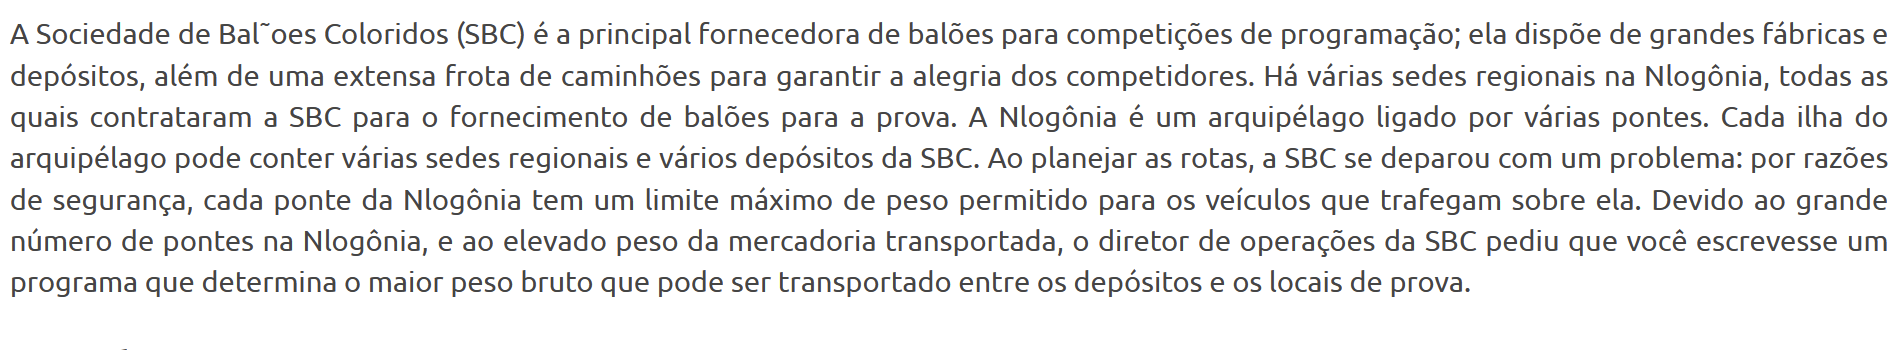


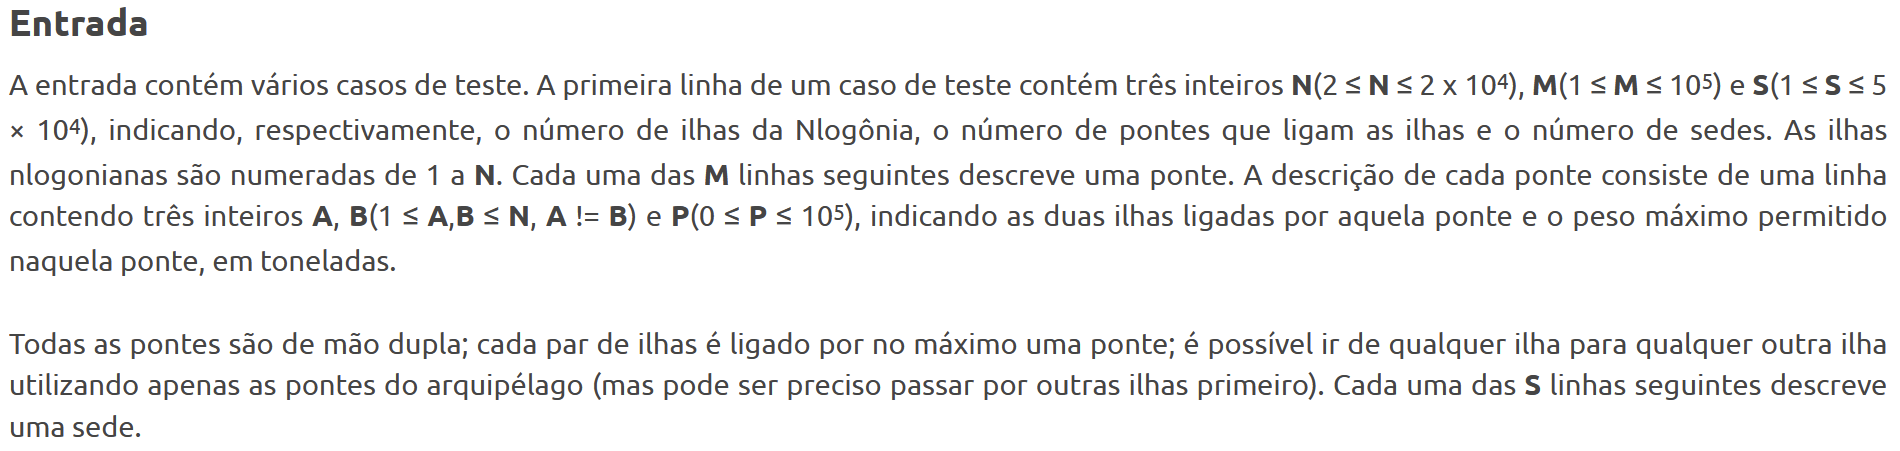

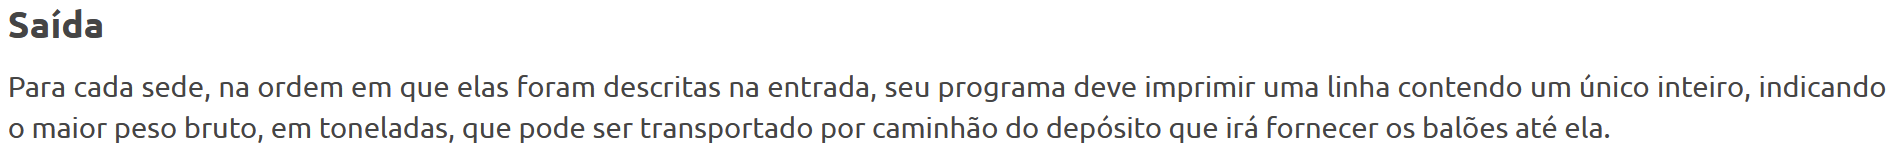

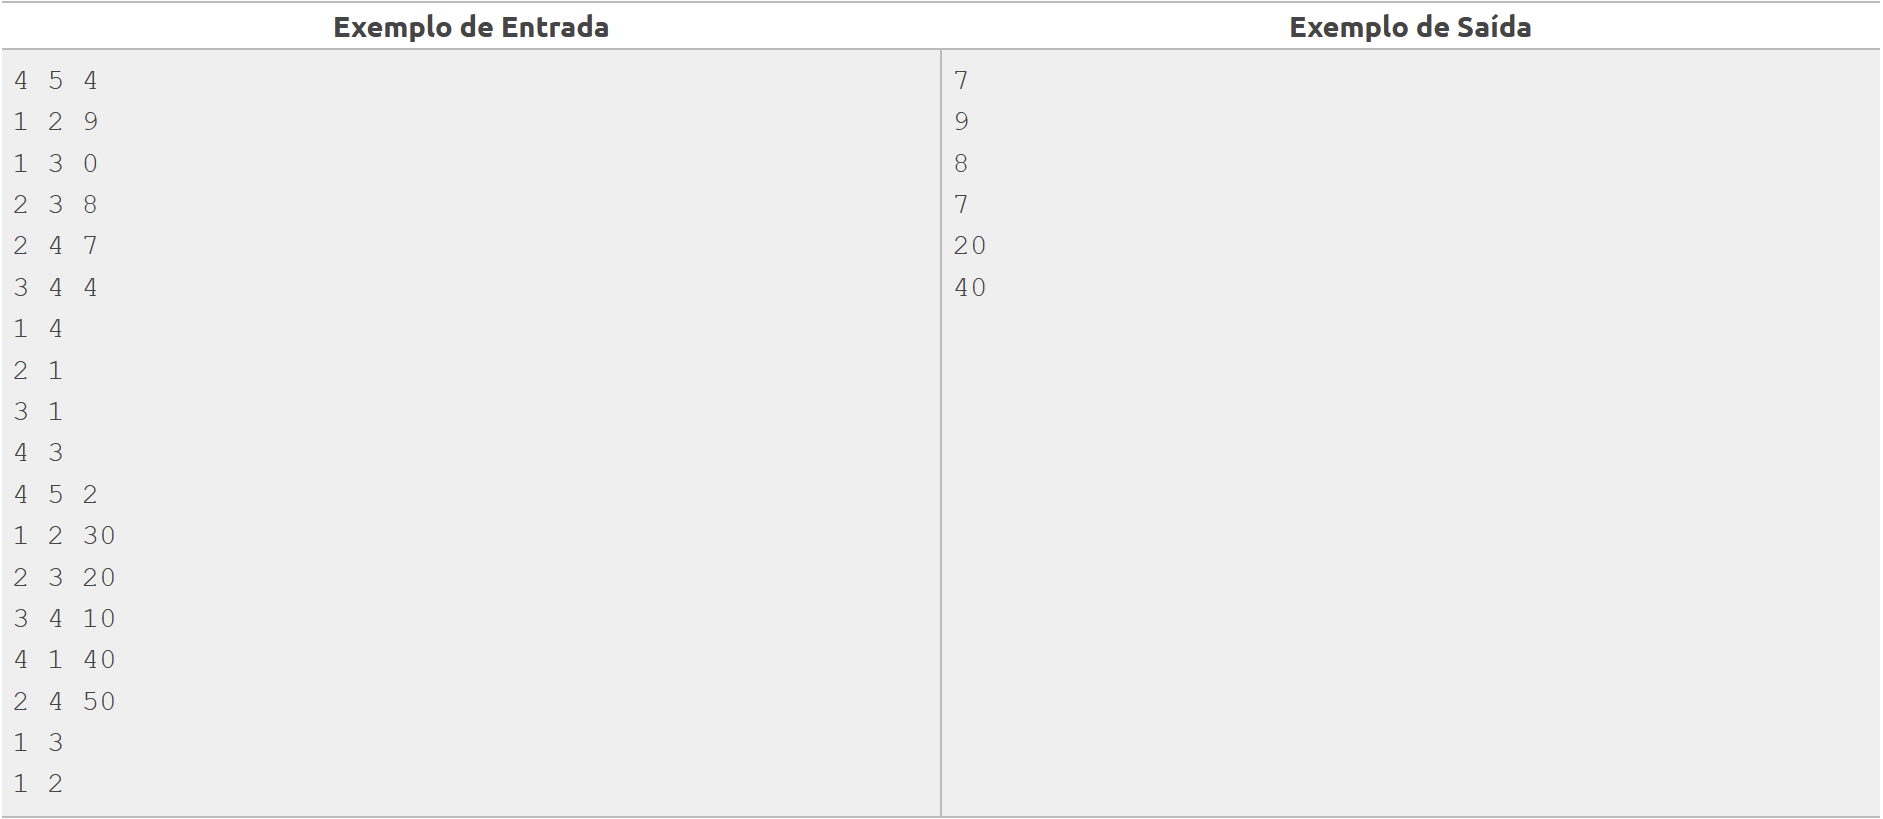

Primeira Linha: <p>
1º: Nº de Ilhas <p>
2º: Nº de Pontes <p>
3º: Sedes

Linha Ponte: <p>
1º: Origem <p>
2º: Destino <p>
3º: Peso máximo

Linha Sedes: <p>
1º: Início do Trajeto <p>
2º: Fim do Trajeto

In [41]:
matriz = []
with open("/content/Caminhao/Input2.txt", "r") as file:
    for line in file:
      if line == "\n":
        continue
      else:
        numeros = list(map(int, line.strip().split()))
        matriz.append(numeros)

print(matriz)

[[3, 3, 2], [1, 2, 10], [2, 3, 15], [1, 3, 5], [1, 2], [2, 3], [4, 4, 3], [1, 2, 20], [2, 3, 25], [3, 4, 30], [1, 4, 15], [1, 3], [2, 4], [4, 1], [5, 6, 2], [1, 2, 40], [2, 3, 10], [3, 4, 20], [4, 5, 25], [1, 5, 5], [2, 4, 35], [1, 5], [3, 2], [3, 2, 1], [1, 2, 8], [2, 3, 12], [1, 3], [6, 7, 4], [1, 2, 45], [2, 3, 20], [3, 4, 15], [4, 5, 10], [5, 6, 30], [1, 3, 5], [2, 5, 25], [1, 6], [2, 4], [3, 5], [4, 1], [4, 5, 2], [1, 2, 15], [2, 3, 20], [3, 4, 25], [1, 3, 0], [2, 4, 40], [1, 4], [3, 2], [5, 5, 3], [1, 2, 30], [2, 3, 35], [3, 4, 40], [4, 5, 15], [1, 4, 10], [1, 5], [2, 3], [4, 1], [4, 4, 1], [1, 2, 5], [2, 3, 45], [3, 4, 20], [1, 4, 15], [2, 4], [6, 8, 3], [1, 2, 10], [2, 3, 20], [3, 4, 30], [4, 5, 40], [5, 6, 50], [1, 3, 15], [2, 4, 25], [3, 5, 35], [1, 6], [3, 4], [5, 2], [5, 6, 2], [1, 2, 25], [2, 3, 30], [3, 4, 15], [4, 5, 20], [1, 4, 10], [2, 5, 5], [1, 3], [4, 2]]


##2.1. Algoritmo de Djikstra

In [42]:
def djiks(grafo, inicio, fim):
    # Para maximizar o peso mínimo ao longo do caminho, transformamos os pesos
    # Subtraímos cada peso de um valor grande para inverter a lógica (Dijkstra minimiza a soma)
    max_peso = max([d['weight'] for u, v, d in grafo.edges(data=True)]) + 1
    grafo_transformado = nx.Graph()
    for u, v, d in grafo.edges(data=True):
        grafo_transformado.add_edge(u, v, weight=max_peso - d['weight'])

    # Usamos a função dijkstra_path do NetworkX para encontrar o caminho, dijkstra_path calcula o caminho mais curto baseado na soma dos pesos.
    # corresponde ao caminho com maior peso mínimo no grafo original.
    try:
        caminho = nx.dijkstra_path(grafo_transformado, inicio, fim, weight='weight')
        # Calcular o peso mínimo ao longo do caminho no grafo original
        peso_minimo = float('inf')
        for i in range(len(caminho) - 1):
            peso_aresta = grafo[caminho[i]][caminho[i+1]]['weight']
            peso_minimo = min(peso_minimo, peso_aresta)
        return caminho, peso_minimo
    except nx.NetworkXNoPath:
        return [], float('-inf')


##2.2. Djikstra Modificado (Caminho de maior peso mínimo)

In [43]:
# Função para encontrar o caminho com maior peso
def caminho_maior_peso(grafo, inicio, fim):
    # Inicializar os pesos máximos e os caminhos
    pesos = {no: float('-inf') for no in grafo.nodes}
    pesos[inicio] = float('inf')  # Peso inicial é o maior
    caminho = {no: [] for no in grafo.nodes}
    caminho[inicio] = [inicio]


    # Fila de prioridade
    visitados = set()
    nos = set(grafo.nodes)

    def maior_peso(no):
      return pesos[no]

    while nos:
        # Escolher o nó com maior peso acumulado
        no_atual = max((no for no in nos if no not in visitados),
               key = maior_peso, default = None)
        if no_atual is None:
            break

        visitados.add(no_atual)
        nos.remove(no_atual)

        # Para cada vizinho do nó atual
        for vizinho in grafo.neighbors(no_atual):
            if vizinho in visitados:
                continue

            # Peso da aresta
            peso_aresta = grafo[no_atual][vizinho]['weight']
            # Peso do caminho até o vizinho é o mínimo entre o peso acumulado e o peso da aresta
            peso_caminho = min(pesos[no_atual], peso_aresta)

            if peso_caminho > pesos[vizinho]:
                pesos[vizinho] = peso_caminho
                caminho[vizinho] = caminho[no_atual] + [vizinho]

    return caminho[fim], pesos[fim]


##2.3. Processamento do restante das informações

In [44]:
# Função para processar a matriz e separar os grafos
def processar_matriz(matriz):
    grafos = []
    i = 0
    while i < len(matriz):
        # Extrair informações do grafo atual
        num_ilhas, num_pontes, num_sedes = matriz[i]
        grafo_info = {
            "num_ilhas": num_ilhas,
            "num_pontes": num_pontes,
            "num_sedes": num_sedes,
            "pontes": [],
            "sedes": []
        }

        # Extrair as pontes
        for j in range(i + 1, i + 1 + num_pontes):
            grafo_info["pontes"].append(matriz[j])

        # Extrair as sedes
        for j in range(i + 1 + num_pontes, i + 1 + num_pontes + num_sedes):
            grafo_info["sedes"].append(matriz[j])

        grafos.append(grafo_info)
        i += 1 + num_pontes + num_sedes

    return grafos

# Função para plotar o grafo e destacar o caminho
def plotar_grafo(grafo, caminho, inicio, fim, grafo_idx, trajeto_idx):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(grafo)

    # Desenhar o grafo
    # Arestas normais (em preto)
    nx.draw_networkx_edges(grafo, pos, edge_color='black', width=2)

    # Arestas do caminho destacado (em vermelho)
    if caminho:
        caminho_arestas = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
        nx.draw_networkx_edges(grafo, pos, edgelist=caminho_arestas, edge_color='red', width=3)

    # Desenhar os nós
    nx.draw_networkx_nodes(grafo, pos, node_color='yellow', node_size=700)
    nx.draw_networkx_labels(grafo, pos, font_size=15, font_weight='bold')

    # Desenhar os pesos das arestas
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_size=12)

    # Título do gráfico
    plt.title(f"Grafo {grafo_idx} - Trajeto de {inicio} para {fim}")
    plt.axis('off')
    plt.show()


##2.4. Processamento de grafo com algoritmos

In [45]:
# Função para processar um grafo com djikstra e calcular os caminhos
def processar_grafo_djikstra(grafo_info, grafo_idx):
    num_ilhas = grafo_info["num_ilhas"]
    num_pontes = grafo_info["num_pontes"]
    num_sedes = grafo_info["num_sedes"]
    pontes = grafo_info["pontes"]
    sedes = grafo_info["sedes"]

    # Criar o grafo com NetworkX
    G = nx.Graph()
    # Adicionar nós (ilhas)
    for i in range(1, num_ilhas + 1):
        G.add_node(i)

    # Adicionar arestas (pontes) com pesos
    for origem, destino, peso in pontes:
        G.add_edge(origem, destino, weight=peso)

    # Calcular o caminho com maior peso para cada trajeto
    resultados = []
    for idx, (inicio, fim) in enumerate(sedes, 1):
        caminho, peso = djiks(G, inicio, fim)
        resultados.append({
            "inicio": inicio,
            "fim": fim,
            "caminho": caminho,
            "peso": peso
        })

        # Plotar o grafo com o caminho destacado
        plotar_grafo(G, caminho, inicio, fim, grafo_idx, idx)

    return resultados

# Função para processar um grafo com cmp e calcular os caminhos
def processar_grafo_cmp(grafo_info, grafo_idx):
    num_ilhas = grafo_info["num_ilhas"]
    num_pontes = grafo_info["num_pontes"]
    num_sedes = grafo_info["num_sedes"]
    pontes = grafo_info["pontes"]
    sedes = grafo_info["sedes"]

    # Criar o grafo com NetworkX
    G = nx.Graph()
    # Adicionar nós (ilhas)
    for i in range(1, num_ilhas + 1):
        G.add_node(i)

    # Adicionar arestas (pontes) com pesos
    for origem, destino, peso in pontes:
        G.add_edge(origem, destino, weight=peso)

    # Calcular o caminho com maior peso para cada trajeto
    resultados = []
    for idx, (inicio, fim) in enumerate(sedes, 1):
        caminho, peso = caminho_maior_peso(G, inicio, fim)
        resultados.append({
            "inicio": inicio,
            "fim": fim,
            "caminho": caminho,
            "peso": peso
        })

        # Plotar o grafo com o caminho destacado
        plotar_grafo(G, caminho, inicio, fim, grafo_idx, idx)

    return resultados

#3. Resultado:


Resultados para o Grafo 1:


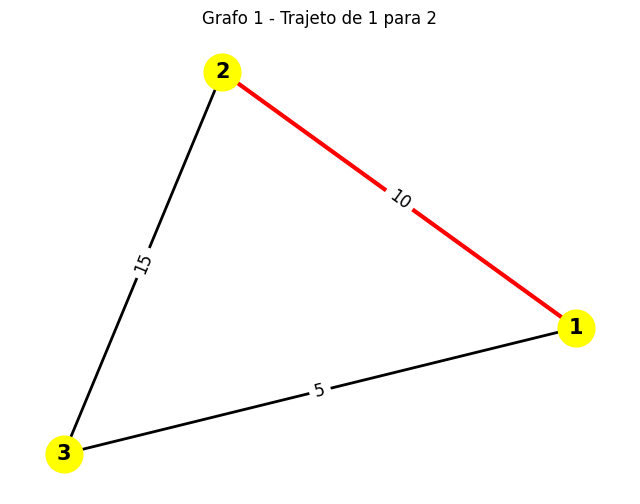

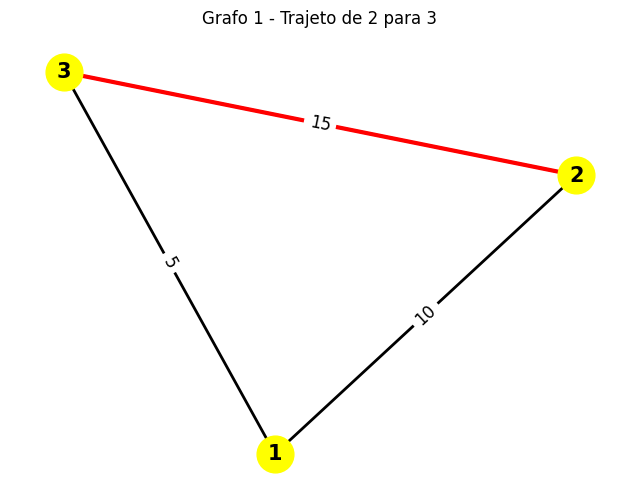

Trajeto de 1 para 2:
Caminho: [1, 2]
Peso máximo: 10

Trajeto de 2 para 3:
Caminho: [2, 3]
Peso máximo: 15


Resultados para o Grafo 2:


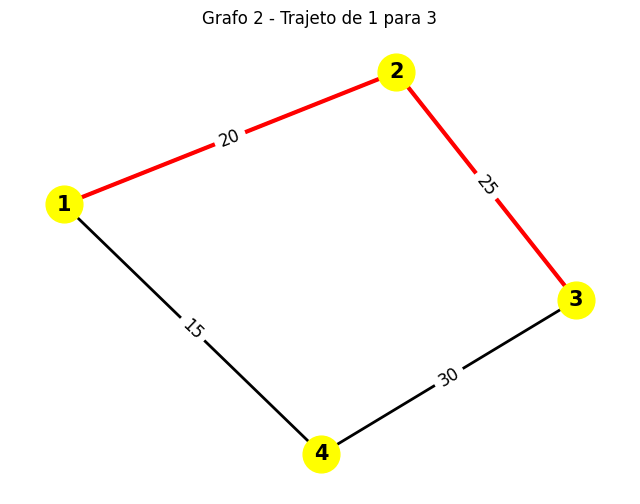

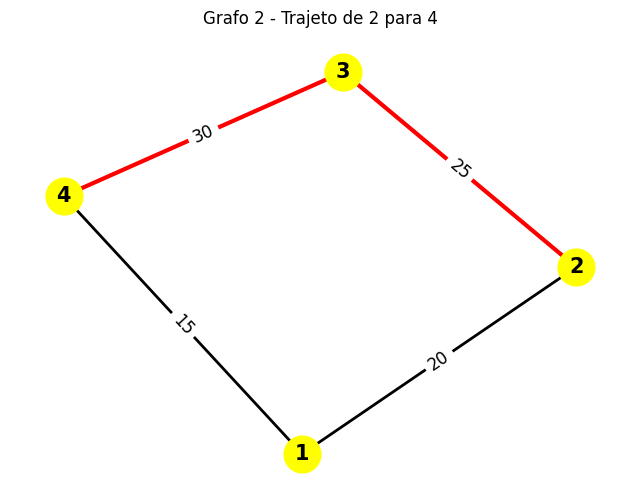

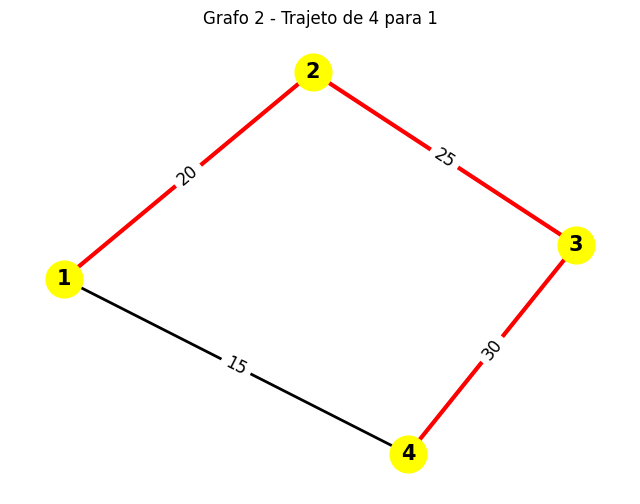

Trajeto de 1 para 3:
Caminho: [1, 2, 3]
Peso máximo: 20

Trajeto de 2 para 4:
Caminho: [2, 3, 4]
Peso máximo: 25

Trajeto de 4 para 1:
Caminho: [4, 3, 2, 1]
Peso máximo: 20


Resultados para o Grafo 3:


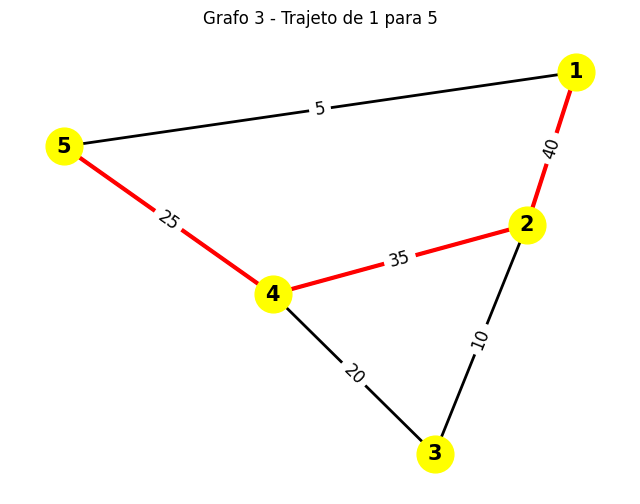

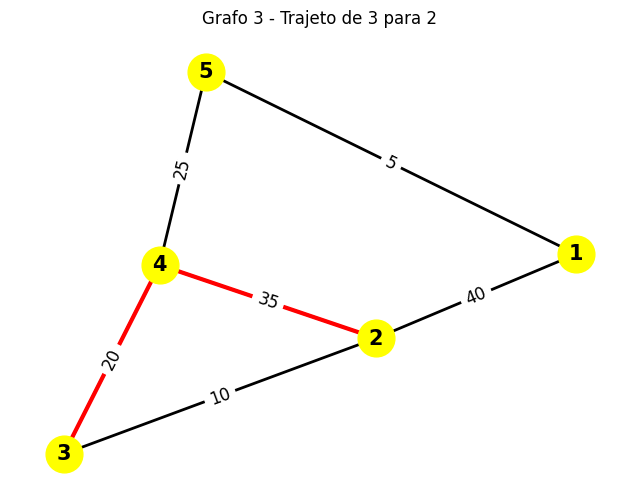

Trajeto de 1 para 5:
Caminho: [1, 2, 4, 5]
Peso máximo: 25

Trajeto de 3 para 2:
Caminho: [3, 4, 2]
Peso máximo: 20


Resultados para o Grafo 4:


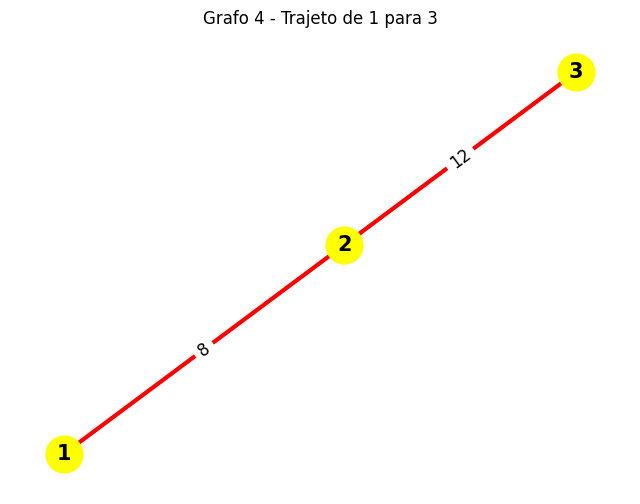

Trajeto de 1 para 3:
Caminho: [1, 2, 3]
Peso máximo: 8


Resultados para o Grafo 5:


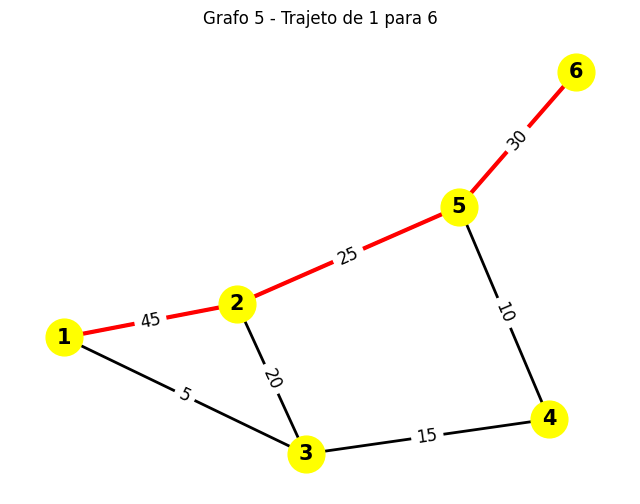

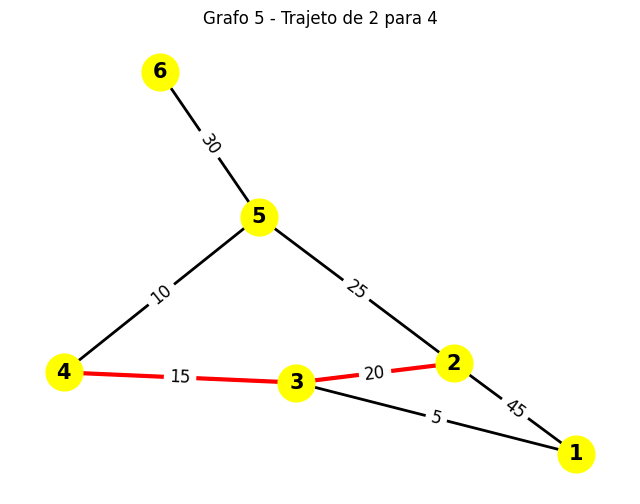

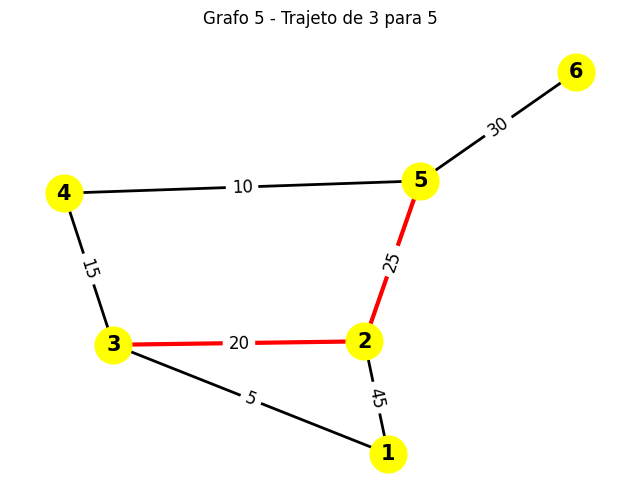

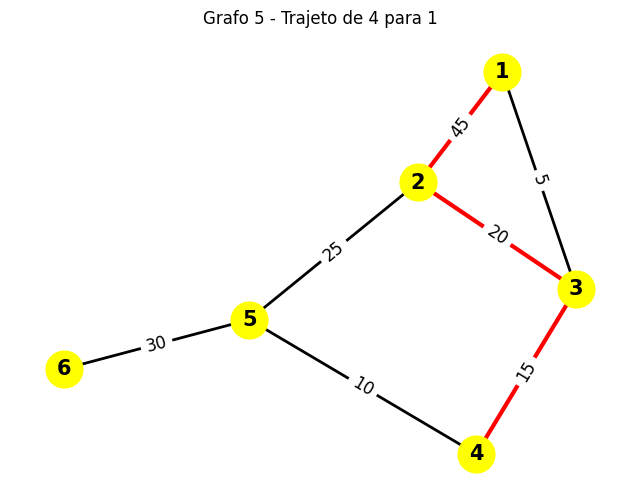

Trajeto de 1 para 6:
Caminho: [1, 2, 5, 6]
Peso máximo: 25

Trajeto de 2 para 4:
Caminho: [2, 3, 4]
Peso máximo: 15

Trajeto de 3 para 5:
Caminho: [3, 2, 5]
Peso máximo: 20

Trajeto de 4 para 1:
Caminho: [4, 3, 2, 1]
Peso máximo: 15


Resultados para o Grafo 6:


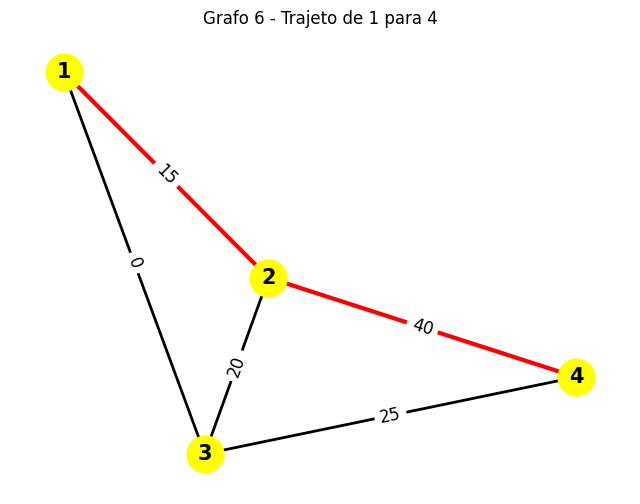

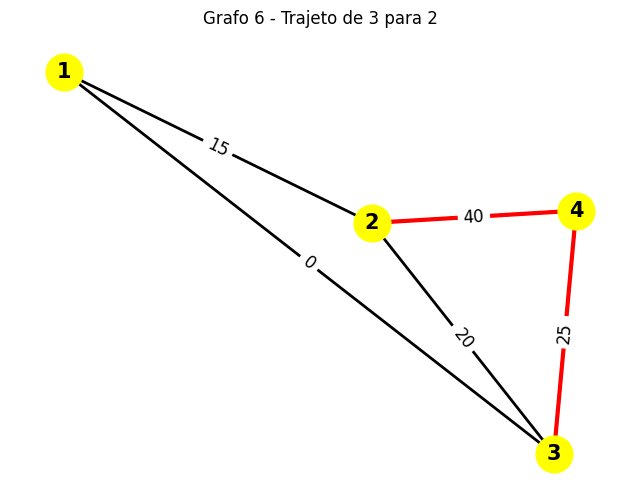

Trajeto de 1 para 4:
Caminho: [1, 2, 4]
Peso máximo: 15

Trajeto de 3 para 2:
Caminho: [3, 4, 2]
Peso máximo: 25


Resultados para o Grafo 7:


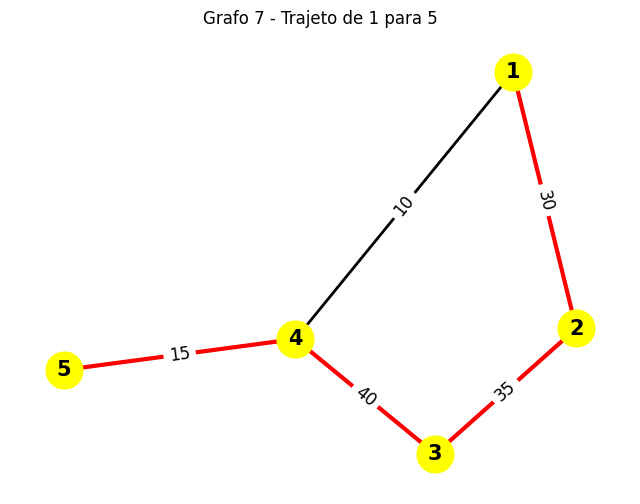

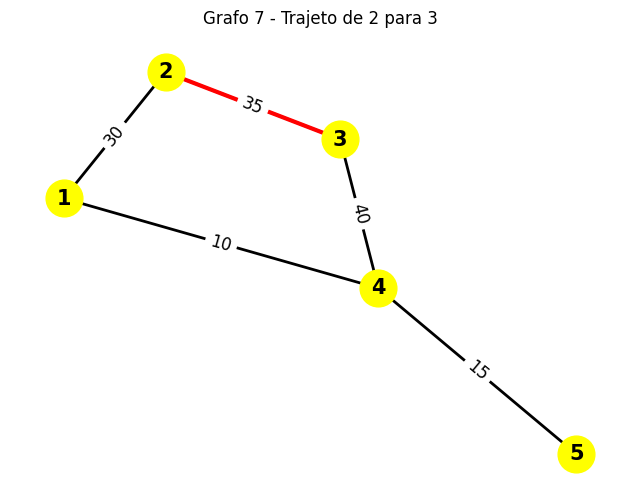

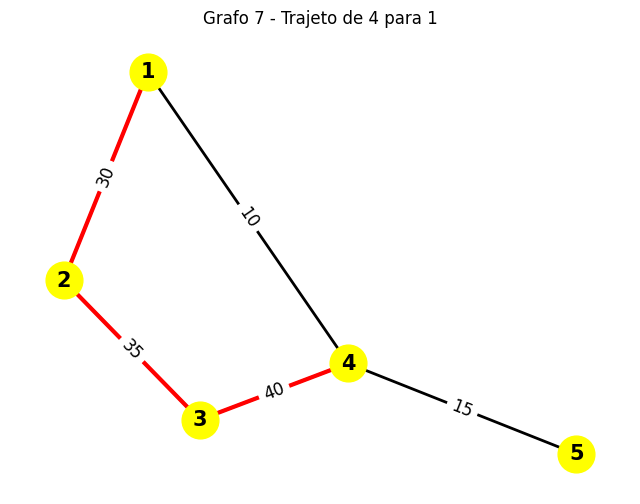

Trajeto de 1 para 5:
Caminho: [1, 2, 3, 4, 5]
Peso máximo: 15

Trajeto de 2 para 3:
Caminho: [2, 3]
Peso máximo: 35

Trajeto de 4 para 1:
Caminho: [4, 3, 2, 1]
Peso máximo: 30


Resultados para o Grafo 8:


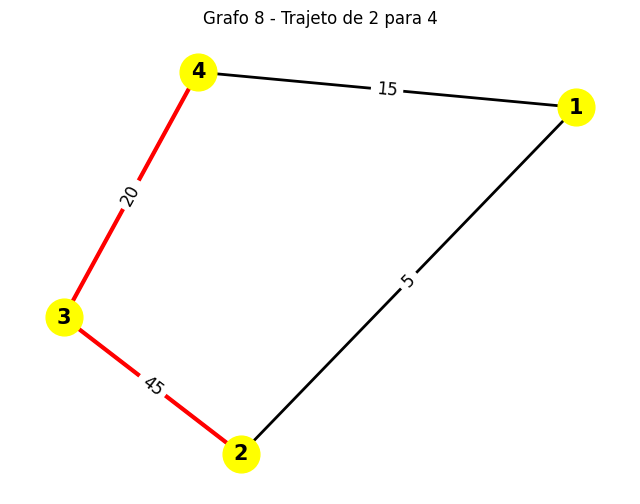

Trajeto de 2 para 4:
Caminho: [2, 3, 4]
Peso máximo: 20


Resultados para o Grafo 9:


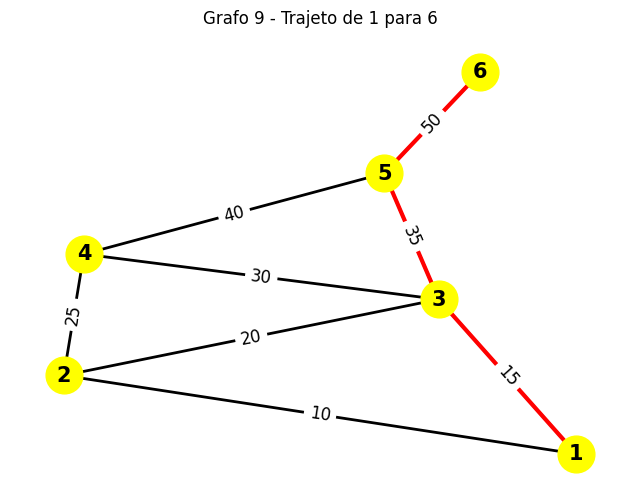

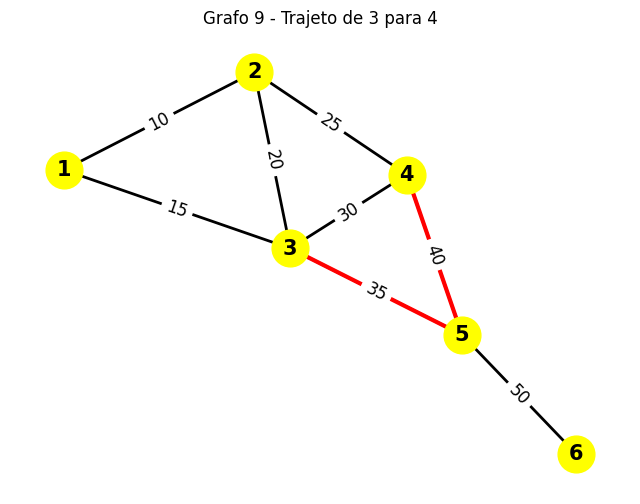

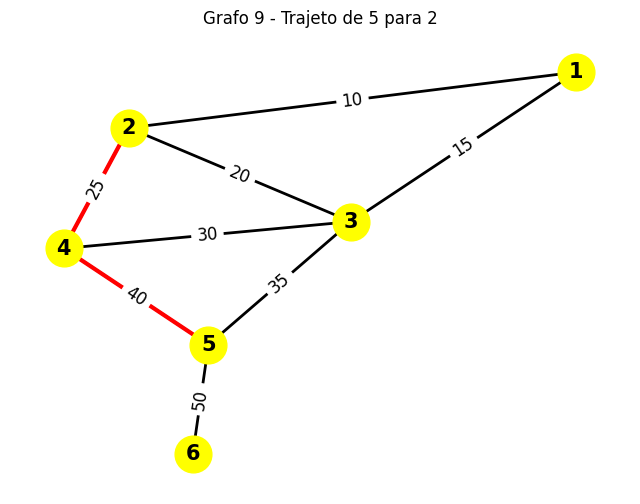

Trajeto de 1 para 6:
Caminho: [1, 3, 5, 6]
Peso máximo: 15

Trajeto de 3 para 4:
Caminho: [3, 5, 4]
Peso máximo: 35

Trajeto de 5 para 2:
Caminho: [5, 4, 2]
Peso máximo: 25


Resultados para o Grafo 10:


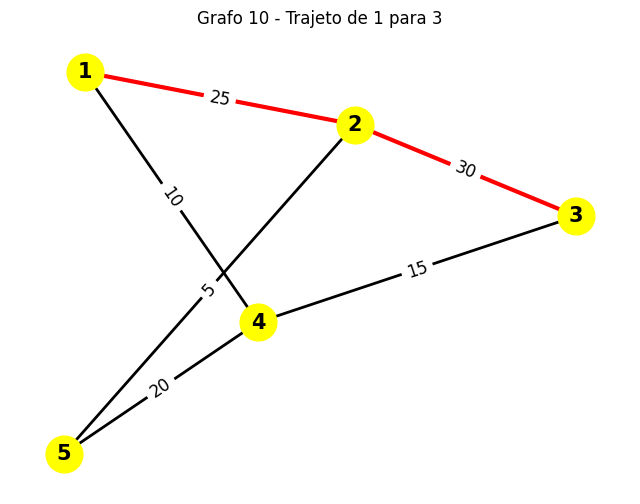

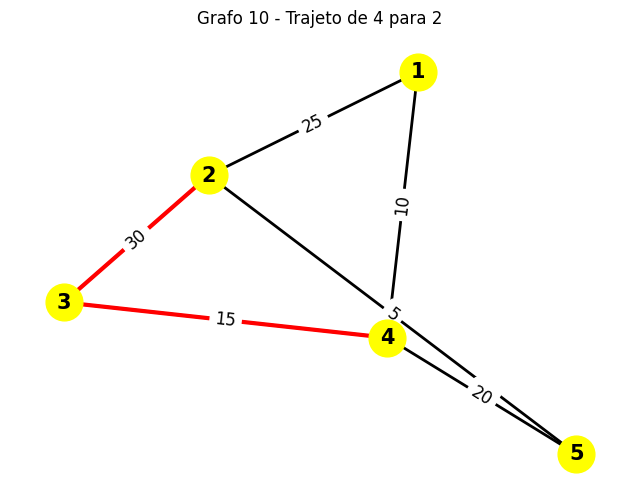

Trajeto de 1 para 3:
Caminho: [1, 2, 3]
Peso máximo: 25

Trajeto de 4 para 2:
Caminho: [4, 3, 2]
Peso máximo: 15



In [47]:
# Passo 1: Separar os grafos
grafos = processar_matriz(matriz)

# Passo 2: Processar cada grafo e calcular os caminhos
for idx, grafo_info in enumerate(grafos, 1):
    print(f"\nResultados para o Grafo {idx}:")
    resultados = processar_grafo_cmp(grafo_info, idx)
    # processar_grafo_cmp / processar_grafo_djikstra

    for resultado in resultados:
        print(f"Trajeto de {resultado['inicio']} para {resultado['fim']}:")
        print(f"Caminho: {resultado['caminho']}")
        print(f"Peso máximo: {resultado['peso']}")
        print()